In [1]:
import boto3
import json
from boto3.dynamodb.conditions import Key, Attr

## var
tableName = 'IL_hc'
reqURL = 'http://www.intellilink.co.jp'

## connect DB
dynamodb = boto3.resource('dynamodb')
table    = dynamodb.Table(tableName)

print('-----------------------------------')
print('Query Data')
result = table.query(
    KeyConditionExpression=Key('Req_URL').eq(reqURL)
)

print(result)
print('-----------------------------------')

-----------------------------------
Query Data
{'Items': [{'Req_URL': 'http://www.intellilink.co.jp', 'Do_Time': Decimal('20190715063806'), 'Duration': Decimal('84039451'), 'Res_Code': '200 OK'}, {'Req_URL': 'http://www.intellilink.co.jp', 'Do_Time': Decimal('20190715065043'), 'Duration': Decimal('62733602'), 'Res_Code': '200 OK'}, {'Req_URL': 'http://www.intellilink.co.jp', 'Do_Time': Decimal('20190715070043'), 'Duration': Decimal('72366809'), 'Res_Code': '200 OK'}, {'Req_URL': 'http://www.intellilink.co.jp', 'Do_Time': Decimal('20190715071043'), 'Duration': Decimal('70109134'), 'Res_Code': '200 OK'}, {'Req_URL': 'http://www.intellilink.co.jp', 'Do_Time': Decimal('20190715072043'), 'Duration': Decimal('67724494'), 'Res_Code': '200 OK'}, {'Req_URL': 'http://www.intellilink.co.jp', 'Do_Time': Decimal('20190715073043'), 'Duration': Decimal('68217941'), 'Res_Code': '200 OK'}, {'Req_URL': 'http://www.intellilink.co.jp', 'Do_Time': Decimal('20190715074043'), 'Duration': Decimal('116583006')

-------------csv------------------
['http://www.intellilink.co.jp', Decimal('20190715063806'), Decimal('84039451'), '200 OK']
['http://www.intellilink.co.jp', Decimal('20190715065043'), Decimal('62733602'), '200 OK']
['http://www.intellilink.co.jp', Decimal('20190715070043'), Decimal('72366809'), '200 OK']
['http://www.intellilink.co.jp', Decimal('20190715071043'), Decimal('70109134'), '200 OK']
['http://www.intellilink.co.jp', Decimal('20190715072043'), Decimal('67724494'), '200 OK']
['http://www.intellilink.co.jp', Decimal('20190715073043'), Decimal('68217941'), '200 OK']
['http://www.intellilink.co.jp', Decimal('20190715074043'), Decimal('116583006'), '200 OK']
['http://www.intellilink.co.jp', Decimal('20190715075043'), Decimal('81851817'), '200 OK']
['http://www.intellilink.co.jp', Decimal('20190715080042'), Decimal('67473790'), '200 OK']
['http://www.intellilink.co.jp', Decimal('20190715081043'), Decimal('83537986'), '200 OK']
['http://www.intellilink.co.jp', Decimal('201907150820

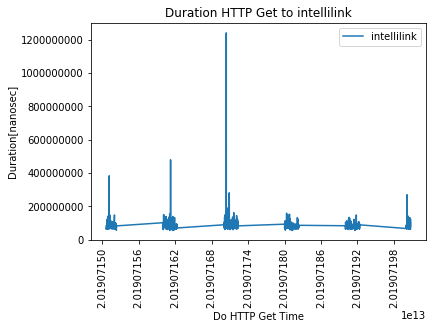

In [6]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
%matplotlib inline

resdata = []
for row in result['Items']:
    rowdata = []
    rowdata.append(row['Req_URL'])
    rowdata.append(row['Do_Time'])
    rowdata.append(row['Duration'])
    rowdata.append(row['Res_Code'])
    resdata.append(rowdata)

print('-------------resdata----------------')
print(resdata)
print('-----------------------------------')

# xyデータに再マッピング
x = []
y = []

for data in resdata:
    x.append(int(data[1]))
    y.append(int(data[2]))
    
# データ表示
print('------------')
print(x)
print('------------')
print(y)
    
# グラフ内容設定
plt.xlabel("Do HTTP Get Time")
plt.ylabel("Duration[nanosec]")

plt.xticks(rotation=90)

plt.title('Duration HTTP Get to intellilink')
plt.plot(x, y, label = "intellilink")
plt.legend()

# Y軸のフォーマットを設定
plt.gca().ticklabel_format(style='plain', axis='y')

# X軸の数字をオフセットを使わずに表現する
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

# X軸の数字が必ず整数になるようにする
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))

# 表示
plt.show()



In [11]:
print('ReqURL,Do_Time,Duration,Res_Code')
for data in resdata:
    print(str(data[0]) + ',' + str(data[1]) + ',' + str(data[2]) + ',' + str(data[3]))


ReqURL,Do_Time,Duration,Res_Code
http://www.intellilink.co.jp,20190715063806,84039451,200 OK
http://www.intellilink.co.jp,20190715065043,62733602,200 OK
http://www.intellilink.co.jp,20190715070043,72366809,200 OK
http://www.intellilink.co.jp,20190715071043,70109134,200 OK
http://www.intellilink.co.jp,20190715072043,67724494,200 OK
http://www.intellilink.co.jp,20190715073043,68217941,200 OK
http://www.intellilink.co.jp,20190715074043,116583006,200 OK
http://www.intellilink.co.jp,20190715075043,81851817,200 OK
http://www.intellilink.co.jp,20190715080042,67473790,200 OK
http://www.intellilink.co.jp,20190715081043,83537986,200 OK
http://www.intellilink.co.jp,20190715082043,123547746,200 OK
http://www.intellilink.co.jp,20190715083043,63063678,200 OK
http://www.intellilink.co.jp,20190715084043,121960876,200 OK
http://www.intellilink.co.jp,20190715085042,92598609,200 OK
http://www.intellilink.co.jp,20190715090043,87852354,200 OK
http://www.intellilink.co.jp,20190715091042,140990222,200 OK
htt